In [688]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets 
from sklearn import metrics


from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error  #  'neg_mean_squared_error'
from sklearn.metrics import r2_score 

from sklearn.metrics import make_scorer

In [689]:
# load the boston data, sklearn.utils.Buncn type data 
data = datasets.load_boston()
# print (data.DESCR)

In [690]:
colnames = list(data.feature_names)
len(colnames)

13

In [691]:
price = pd.DataFrame(data.target)
print (type(price))
price.shape

<class 'pandas.core.frame.DataFrame'>


(506, 1)

In [692]:
x = pd.DataFrame(data.data)
# rename colnames
x.columns = colnames 
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [693]:
slices = [45, 34, 12]
x.index.ravel()[slices]

array([45, 34, 12], dtype=int64)

In [694]:
slices = [45, 34, 12]
price.index.ravel()[slices]

array([45, 34, 12], dtype=int64)

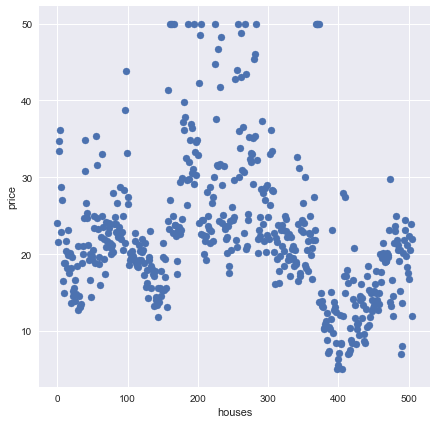

In [695]:
fig = plt.figure(figsize = (7, 7))

plt.scatter(list(x.index), price)
plt.xlabel('houses')
plt.ylabel('price')

plt.show()

### Trained RF regressor (criterion='mse') scores 

In [413]:
# train test split, which also has the shuffle parameter, by default shuffle = True
x_train, x_test, y_train, y_test = train_test_split(x, price, test_size = 0.2, random_state = 0)


# meaning of random state in RF here - control the randomness in feature subset selection at each split  

regr = RandomForestRegressor(random_state = 0)
regr.fit(x_train, y_train)

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

### built-in and self defined MSE, r^2 comparison

#### R^2 assesses goodness of fit of the model

In [416]:
# coefficient of determination R^2 of the prediction, amount of variation in the depdent variable explained by the independent  variabels
print ('built-in r^2 score is {}'.format(regr.score(x_test, y_test)))

# definition of coefficient of determination
r2 = 1 - sum((np.ravel(y_test) - regr.predict(x_test)) **2) /sum((np.ravel(y_test) - np.ravel(y_test).mean()) ** 2)

print ('defined variation explained by the model r^2 score is {}'.format(r2))

built-in r^2 score is 0.7234367743733019
defined variation explained by the model r^2 score is 0.7234367743733021


In [421]:
from sklearn.metrics import mean_squared_error  

## built-in testing MSE 
y_pred = regr.predict(x_test)
print (mean_squared_error(y_test, y_pred))

## built-in training MSE
print (mean_squared_error(y_train, regr.predict(x_train)))

22.5201117647
2.04637747525


In [424]:
# self-defined MSE function

def MSE(x, y, model):
    predicts = model.predict(x)
    sse = []
    
    for i in range(len(predicts)):
        sse.append((y.iloc[i] - predicts[i]) **2)

    MSE = sum(sse)/len(predicts)
    return MSE

In [425]:
## self defined testing MSE 
print (MSE(x_test, y_test, regr))

## self defiend training MSE
print (MSE(x_train, y_train, regr))

0    22.520112
dtype: float64
0    2.046377
dtype: float64


#### KFold is only a splitter that can be used to implement CV manually 

In [450]:
# Provides train/test indices to split data in train/test sets. 
# Split dataset into k consecutive folds. default shuffle = False
# Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

from sklearn.model_selection import KFold 

kf = KFold(n_splits = 10, random_state = 0)

print (kf.get_n_splits(x))

10


In [469]:
# for train_index, test_index in kf.split(x):
#     print('TRAIN:' ,train_index, 'TEST:' , test_index)

In [512]:
# print (train_index.shape)
# print (test_index.shape)

In [517]:
# CV with KFold manually 

# [regr.fit(x.index.ravel()[train_index], price.index.ravel()[train_index]).score(x.index.ravel()[test_index], price.index.ravel()[test_index]) for train_index, test_index in kf.split(x.index.ravel())]

In [454]:
# cross_val_score helper function uses KFold automatically in implementing cross validation when called upon 

print ((cross_val_score(regr, x, np.ravel(price), cv = kf, scoring = 'neg_mean_squared_error')).shape)

np.mean(cross_val_score(regr, x, np.ravel(price), cv = kf, scoring = 'neg_mean_squared_error'))

(10,)


-24.341840454901963

In [491]:
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

MSE = make_scorer(mean_squared_error)
np.mean(cross_val_score(regr, x, np.ravel(price), cv = kf, scoring = MSE))

24.341840454901963

### MSEs are the same for the followings 
- self defined
- sklearn.metrics.mean_squared_error
- sklearn.mode_selection.cross_val_score scoring ='neg_mean_squared_error' 


## Cross Validation in expected testing error estimation

### sklearn.model_selection. cross_val_score
### self-defiend MSE in self-defined MSE
### sklearn.model_selection. ShuffleSplit

The cross_validate function differs from cross_val_score in two ways 
- It allows specifying multiple metrics for evaluation.
- It returns a dict containing training scores, fit-times and score-times in addition to the test score.

Random Initialization
Some cross validation iterators, such as KFold, have an inbuilt option to shuffle the data indices before splitting them. Note that:
- This consumes less memory than shuffling the data directly.
- By default no shuffling occurs, including for the (stratified) K fold cross- validation performed by specifying cv=some_integer to cross_val_score, grid search, etc. Keep in mind that train_test_split still returns a random split.
- The random_state parameter defaults to None, meaning that the shuffling will be different every time KFold(..., shuffle=True) is iterated. However, GridSearchCV will use the same shuffling for each set of parameters validated by a single call to its fit method.
- To get identical results for each split, set random_state to an integer.

#### model_selection.cross_val_score

In [519]:
# cross_val_score wants y as  np array instead of pd data frame 
# CV in estimating EXPECTED testing error 

regr = RandomForestRegressor(random_state = 0)

folds = [10, 20, 50, 100, 150, 200, 250, 300, 350, 400]
n_folds = len(folds)
neg_mean_squared_error = []
n = x.shape[0]

# Run K-folds
for k in folds:
    scores = cross_val_score(regr, x, np.ravel(price), cv = k, scoring = 'neg_mean_squared_error')
    neg_mean_squared_error.append(scores.mean())
 
    print("K = {}, neg_mean_squared_error: {}".format (k, neg_mean_squared_error[-1]))

K = 10, neg_mean_squared_error: -24.341840454901963
K = 20, neg_mean_squared_error: -25.02860116923077
K = 50, neg_mean_squared_error: -20.55630070909091
K = 100, neg_mean_squared_error: -17.627685333333332
K = 150, neg_mean_squared_error: -18.767784666666664
K = 200, neg_mean_squared_error: -14.287764333333335
K = 250, neg_mean_squared_error: -13.2710046
K = 300, neg_mean_squared_error: -12.544372
K = 350, neg_mean_squared_error: -12.877516428571427
K = 400, neg_mean_squared_error: -12.645282125


### cross_val_score calls KFold automatically to split the data and compute test error 

In [525]:
# the above should be the same as the following implementation using KFold and make_scorer 

regr = RandomForestRegressor(random_state = 0)
folds = [10, 20, 50, 100, 150, 200, 250, 300, 350, 400]
n_folds = len(folds)
MSE = make_scorer(mean_squared_error)
MSE_error_list = [] 

for k in folds:
    kf = KFold(n_splits = k, random_state = 0)
    scores = cross_val_score(regr, x, np.ravel(price), cv = kf, scoring = MSE)
    MSE_error_list.append(np.mean(scores))
    
    print ('{} folds cv estimates of test error is {}'.format(k, MSE_error_list[-1]))

10 folds cv estimates of test error is 24.341840454901963
20 folds cv estimates of test error is 25.02860116923077
50 folds cv estimates of test error is 20.55630070909091
100 folds cv estimates of test error is 17.627685333333332
150 folds cv estimates of test error is 18.767784666666664
200 folds cv estimates of test error is 14.287764333333335
250 folds cv estimates of test error is 13.2710046
300 folds cv estimates of test error is 12.544372
350 folds cv estimates of test error is 12.877516428571427
400 folds cv estimates of test error is 12.645282125


In [565]:
## use range to create arry for  ticker location indication

# [range(1, n_folds + 1), MSE_error_list, [5] * n_folds]
range(1, n_folds + 1), MSE_error_list, np.sqrt(MSE_error_list)

range(0, n_folds + 2), [''] + [str(k) for k in folds] + ['']

(range(0, 12),
 ['', '10', '20', '50', '100', '150', '200', '250', '300', '350', '400', ''])

### CI for CV expected test error estimation 
- generally lower k, higher bias, lower variance of the estiamted test error 
- generally higher k, lower bias, higher variance of the estiamted expected test error 
- too high k, higher correlations among the data sets used to train the model in each fold (LOOCV as an extreme case), high variance, almost no bias of the estiamted expected test error

strictly speaking  
95% CI for mean estimates with unknow standard error follows xbar +/- 1.96 * standard error of estimator/ sqrt(sample size n)

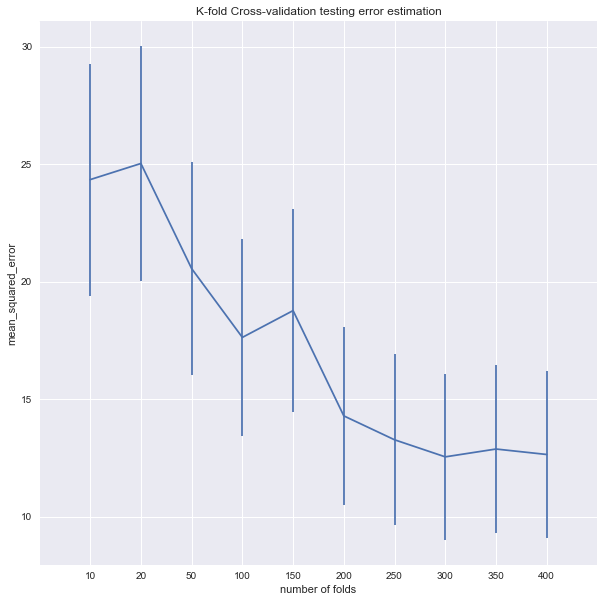

In [557]:
# plot cv test estimation and standard error of the estiamtion together  
# 95% CI of the mean (estimates of expected test error)

fig = plt.figure(figsize = (10, 10))
plt.errorbar(range(1, n_folds + 1), MSE_error_list, np.sqrt(MSE_error_list))  
ax = plt.gca()
plt.xticks(range(0, n_folds + 2), [''] + [str(k) for k in folds] + [''])
# plt.yticks(range(30, 110, 10))

plt.title("K-fold Cross-validation testing error estimation")
plt.xlabel("number of folds")
plt.ylabel("mean_squared_error")

### bias and variance from k folds cross validation estimation of expected test error 
#### ideally, this estimation of error should be close to zero
To check out you model’s bias, find out the mean of all the error estiamtes. If this value is low, it basically means that your model gives low error on an average– indirectly ensuring that your model’s notions about the data are accurate enough.

To check out your model’s variance, compute the standard deviation of all the error estimates. If this value is high, it means that your model’s performance varies a lot with the dataset used for training.

In [551]:
# fig = plt.figure(figsize = (10, 10))
# plt.errorbar(range(1, n_folds + 1), MSE_error_list, yerr=[5] * n_folds)  # Use 5% for the error bars
# ax = plt.gca()
# plt.xticks(range(0, n_folds + 2), [''] + [str(k) for k in folds] + [''])
# # plt.yticks(range(30, 110, 10))

# plt.title("K-fold Cross-validation testing error estimation")
# plt.xlabel("number of folds")
# plt.ylabel("mean_squared_error")

In [566]:
# when the number of folds is 400, training sample size is around 504, which is like using all the sample data in training the model
# test error stablizes after 300 folds
print ((x.shape[0]/ 400) *399)
print ((x.shape[0]/ 300) *299)

504.73499999999996
504.31333333333333


C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


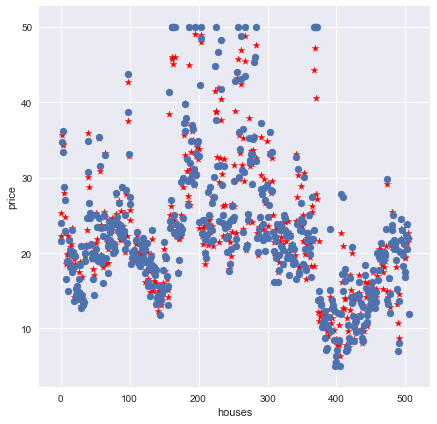

In [338]:
regr.fit(x_train, y_train)

fig = plt.figure(figsize = (7, 7))

fig.add_subplot(1, 1, 1)
plt.scatter(list(x.index), y = regr.predict(x), color = 'r', marker = '*')

plt.scatter(list(x.index), price)
plt.xlabel('houses')
plt.ylabel('price')

plt.show()

### CV Folds and leanring curve 

too large the K could lead to overestimation of the EXPECTED testing error as training set inclues most of the sample data available 
the large K could also leads to higher run time and higher varince 
when the slope of learning curve is flat for 90% of the data, it's ok to ignore the bias and use k = 10

**A learning curve** shows the validation and training score of an estimator for varying numbers of training samples.
- varying numbers of traning samples is like varying the number od folds in cross validation 

It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. 
If both **the validation score** and **the training score** converge to a value that is **too low** with increasing size of the training set, we will not benefit much from more training data.

In [567]:
# Learning Curve - Determines cross-validated training and test scores for different training set sizes/ 
# /like different number of folds

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [568]:
# help(ShuffleSplit)

In [573]:
def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None, n_jobs = 1, train_sizes = np.linspace(.1, 1.0, 8)):
    """
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

    n_jobs : integer, optional Number of jobs to run in parallel (default 1).
    
    train_size : Relative or absolute numbers of training examples that will be used to generate the learning curve. 
        If the dtype is float, it is regarded as a fraction of the maximum size of the training set (that is determined by the selected validation method), i.e. it has to be within (0, 1]. 
        Otherwise it is interpreted as absolute sizes of the training sets. 
        Note that for classification the number of samples usually have to be big enough to contain at least one sample from each class. (default: np.linspace(0.1, 1.0, 5))

    """
    
    plt.figure(figsize = (10, 10))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("MSE Score")
    
    MSE = make_scorer(mean_squared_error)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring = MSE, n_jobs=n_jobs, train_sizes = train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt


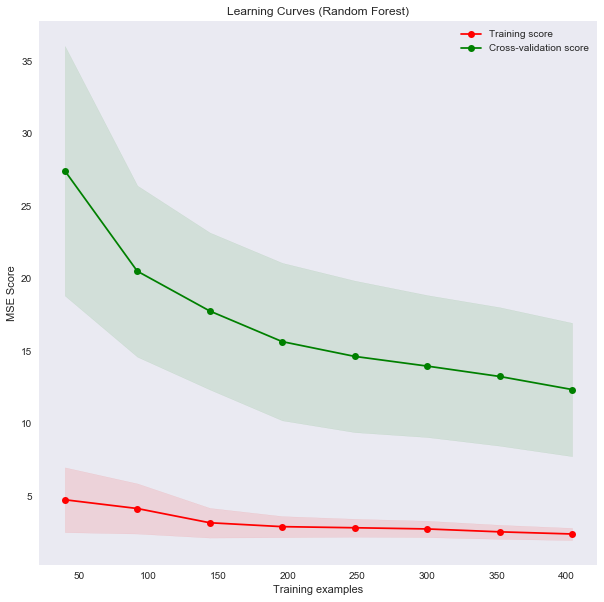

In [576]:
title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 0)

plot_learning_curve(regr, title, x, price, # ylim=(0.7, 1.01), 
                    cv = cv, n_jobs = 4)

plt.show()

### Learning curve and bias and varince trade off
- When a fit has high bias, the training and cross-validation error converge at high error values, as training sample increases
- When a fit has high variance, the gap between the training error and cross-validation error remains large, as the number of training samples increases. Adding more training sample may help to alleviate the variation.
- Idealy, would want the training error and validation error converge at relatively low error value.

### difference between sklearn.model_selection.KFold and sklearn.model_selection.ShuffleSplit
- KFold splits data into K consecutive train/test folds without shuffling by default
- ShuffleSplit is a random permutaion cross validator; contrary to other cross-validation strategies, random splits do not guarantee that all folds will be different, although this is still very likely for sizeable datasets.

In [588]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [615]:
## slicing dataframe 

x.loc[0] == x.iloc[0]
# iloc for integer location 
x.iloc[:, 1]
# loc for label/ names 
sum(x.loc[:, 'ZN'] == x.iloc[:, 1])

506

#### self-defined MSE and  self-defined CV

In [626]:
# self-defined MSE function
'''
input: independent(dataframe) 
       and dependent data(array) pairs  
       and the model 
output: MSE
'''
def MSE(x, y, model):
    predicts = model.predict(x)
    sse = []
    
    for i in range(len(predicts)):
        sse.append((y[i] - predicts[i]) **2)

    MSE = np.mean(sse)
    return MSE

In [627]:
# split data into k folds

'''
input: complete data set and the number of folds in cross validation
output: train/ test data index for each fold 
'''
def cv_split(data, kfold):
    index_test = []
    index_train =[]
    fold_size = int(data.shape[0] / kfold)
    
    for i in range(kfold):
        
        index_te = random.sample(range(data.shape[0]), fold_size)
        index_tr = list(set(range(data.shape[0])) - set(index_te))
        
        index_test.append(index_te)
        index_train.append(index_tr)
    
    return index_test, index_train

In [628]:
# get cv result with MSE scores
'''
x is a dataframe and 
y is an array
'''

def cv_cal(x, y, model, kfold):
    cv_MSE = []
    for i in range (kfold):
        
        index_test, index_train = cv_split(x, kfold)
        y_test = y[index_test[i]]
        x_test = x.iloc[index_test[i]]
        
        x_train = x.iloc[index_train[i]]
        y_train = y[index_train[i]]
        
        fitted = model.fit(x_train, y_train)
       
        cv_MSE.append(MSE(x_test, y_test, fitted))
        
    return cv_MSE

In [643]:
# regr = RandomForestRegressor(random_state = 0)

# kf = int(x.shape[0]/2)
# # kf = 10 
# cv_MSE = cv_cal(x, np.ravel(price), regr, kfold = kf)

# np.mean(cv_MSE)

In [657]:
from random import seed

each_fold = []   # which is a list of lists to store all the MSE values in each train/ test split for differnet folds of cross validation

plot_mse = []
num_folds = len(folds)
folds = [10, 20, 50, 100, 150, 200, 250, 300, 350, 400]

for kf in folds:
    seed(10)
    regr = RandomForestRegressor(random_state = 0)
    each_fold.append(cv_cal(x, np.ravel(price), regr, kfold = kf))
    plot_mse.append(np.mean(cv_cal(x, np.ravel(price), regr, kfold = kf)))

In [661]:
plot_mse

[14.2743444,
 10.832960999999999,
 11.359795199999999,
 11.730838200000001,
 11.87534044444444,
 10.925490999999997,
 12.391880999999998,
 10.101221000000001,
 10.908128571428572,
 9.2464987499999989]

In [664]:
[np.std(item) for item in each_fold]

[1.9196891729015311,
 12.140031488528948,
 16.295283048326819,
 19.058014448410788,
 13.302154447281419,
 25.27675812050974,
 24.058731948800471,
 41.135190968701153,
 25.49357026905416,
 30.225866801515206]

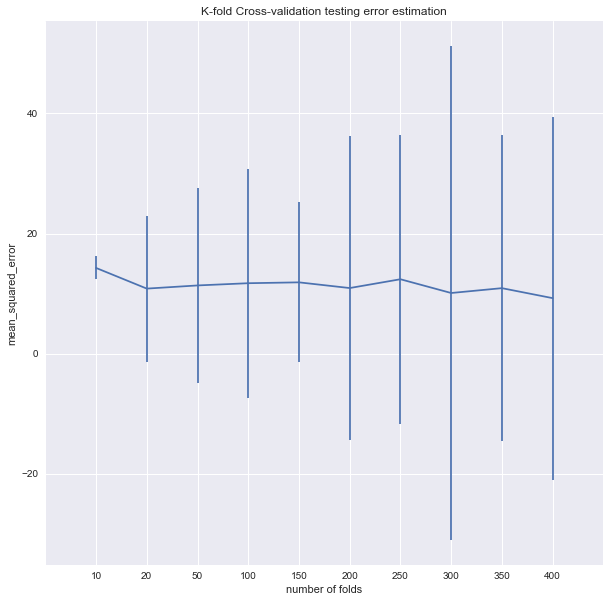

In [663]:
# plot cv test estimation and standard error of the estiamtion together  
# 95% CI of the mean (estimates of expected test error)

fig = plt.figure(figsize = (10, 10))

plt.errorbar(range(1, num_folds + 1), plot_mse, [np.std(item) for item in each_fold])  
ax = plt.gca()
plt.xticks(range(0, num_folds + 2), [''] + [str(k) for k in folds] + [''])
# plt.yticks(range(30, 110, 10))

plt.title("K-fold Cross-validation testing error estimation")
plt.xlabel("number of folds")
plt.ylabel("mean_squared_error")

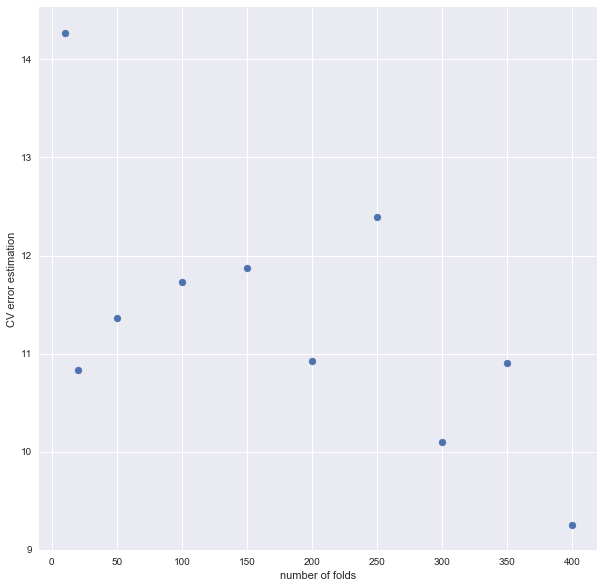

In [660]:
fig = plt.figure(figsize = (10, 10))

plt.scatter (folds, plot_mse)
plt.xlabel('number of folds')
plt.ylabel('CV error estimation')

plt.show()

### why the jumps in self defiend cross validation with MSE, comparing with results from KFold and cross_val_score function

## Tuning & Cross Validation 
### sklearn.model_selection.GridSearchCV
### self-defined gready search tuning 

In [726]:
# self-defined MSE function

def MSE(x, y, model):
    predicts = model.predict(x)
    sse = []
    
    for i in range(len(predicts)):
        sse.append((y[i] - predicts[i]) **2)

    MSE = np.mean(sse)
    return MSE

In [ ]:
# # search for the optimal alpha in LASSO

# def search_alpha(alphas):
    
#     raw_mse = {}

#     for j in alphas:

#         MSE_list = []
#         for i in range(5):
#         # need to iterate through each fold of the splited data and train, test, calculate the averaged MSE            
#             x_train, x_test, y_train, y_test =  train_test_split(data2[featurelist], data2['MKTCAP'], test_size = 0.2, random_state = 0 )
#             lasso = linear_model.Lasso(alpha = j)
#             lasso.fit(x_train, y_train)
#             MSE_list.append(MSE(x_test, y_test, lasso))

#             raw_mse[j] = MSE_list   

#     return raw_mse

In [727]:
# search for the optimal max_features at each split in growing trees

def search_params(max_features, n_estimators):
    
    raw_mse = {}
    
    MSE_list = []
    for j in max_features:
        for i in n_estimators:
            x_trian, x_test, y_train, y_test = train_test_split(x, np.ravel(price), test_size = 0.2, random_state = 0 )
            regr = RandomForestRegressor(max_features = j, n_estimators = i, bootstrap=True, oob_score = True, random_state = 0)
            regr.fit(x_train, y_train)
            
            MSE_list.append(MSE(x_test, y_test, regr)) 
            
            raw_mse[(i, j)] = MSE_list
            
    return raw_mse

In [729]:
max_features = [3, 4, 8, 12]
n_estimators = [100, 200, 300]

raw_mse = search_params(max_features, n_estimators)

raw_mse

{(100, 3): [26.628040107843148,
  25.696756063725473,
  25.460477598039176,
  23.442199117647082,
  24.227195068627463,
  24.360711189542446,
  21.872112617647062,
  22.280960973039207,
  22.074303169934602,
  20.443631166666666,
  18.202989475490188,
  18.247308537036997],
 (100, 4): [26.628040107843148,
  25.696756063725473,
  25.460477598039176,
  23.442199117647082,
  24.227195068627463,
  24.360711189542446,
  21.872112617647062,
  22.280960973039207,
  22.074303169934602,
  20.443631166666666,
  18.202989475490188,
  18.247308537036997],
 (100, 8): [26.628040107843148,
  25.696756063725473,
  25.460477598039176,
  23.442199117647082,
  24.227195068627463,
  24.360711189542446,
  21.872112617647062,
  22.280960973039207,
  22.074303169934602,
  20.443631166666666,
  18.202989475490188,
  18.247308537036997],
 (100, 12): [26.628040107843148,
  25.696756063725473,
  25.460477598039176,
  23.442199117647082,
  24.227195068627463,
  24.360711189542446,
  21.872112617647062,
  22.28096

In [730]:
mse = []
for i in raw_mse.keys():
    mse.append(np.mean(raw_mse[i]))

print (min(mse))

22.7447237571


### What kind of cross validation happened in GridSearchCV
- number of folds
- the type of function called to split train/ test data 

In [ ]:
fig = plt.figure(figsize = (10, 10))

plt.scatter(alphas, mse, marker = '*')
plt.xlabel('alpha')
plt.ylabel('mse')

plt.show()

### built-in GridSearchCV

In [ ]:
# ## LASSO and best alpha 

# # prepare a range of alpha values to test
# param_grid = {
# #               "alpha":[0, 1, 0.1]
#                 "alpha": np.arange(0, 1, 0.01)
#              }

# # create and fit a lasso regression model, testing each alpha
# lasso = Lasso()
# # This is assumed to implement the scikit-learn estimator interface. Either estimator needs to provide a score function
# # or scoring must be passed.

# #### would still want to use mean squared error instead of r^2
# grid = GridSearchCV(estimator = lasso, scoring = 'r2', param_grid = param_grid )
# grid.fit(dataset.data, dataset.target)
# print(grid)


# # summarize the results of the grid search
# print(grid.best_score_)
# print(grid.best_estimator_.alpha)

### with different evauation metrics, optimal model parameters/ tuning results given by GridSearchCV are different.
- which evaluation metrics to use for RF regressor tunuing then ?? 


In [700]:
## RF and max_features at each split 
# all available data is used here, didn't do rain _test_split

from sklearn.model_selection import GridSearchCV

param_grid = { 'max_features': [3, 4, 8, 12],
               'n_estimators': [100, 200, 300]
             }

MSE = make_scorer(mean_squared_error)
regr = RandomForestRegressor(bootstrap=True, oob_score = True, random_state = 0)

# using r2 as optimization criterion
grid_r2 = GridSearchCV(estimator = regr, scoring = 'r2', param_grid = param_grid)
grid_r2.fit(x, np.ravel(price))


# using MSE as optimization criterion
grid_mse = GridSearchCV(estimator = regr, scoring = MSE, param_grid = param_grid)
grid_mse.fit(x, np.ravel(price))

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=True, random_state=0,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [3, 4, 8, 12], 'n_estimators': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(mean_squared_error), verbose=0)

In [704]:
print('best score based on R^2 is {} and best parameters are {}'.format(grid_r2.best_score_, grid_r2.best_params_))

print('best score based on MSE is {} and best parameters are {}'.format(grid_mse.best_score_, grid_mse.best_params_))

best score based on R^2 is 0.5867040494118185 and best parameters are {'max_features': 8, 'n_estimators': 100}
best score based on MSE is 29.42409018725301 and best parameters are {'max_features': 12, 'n_estimators': 200}


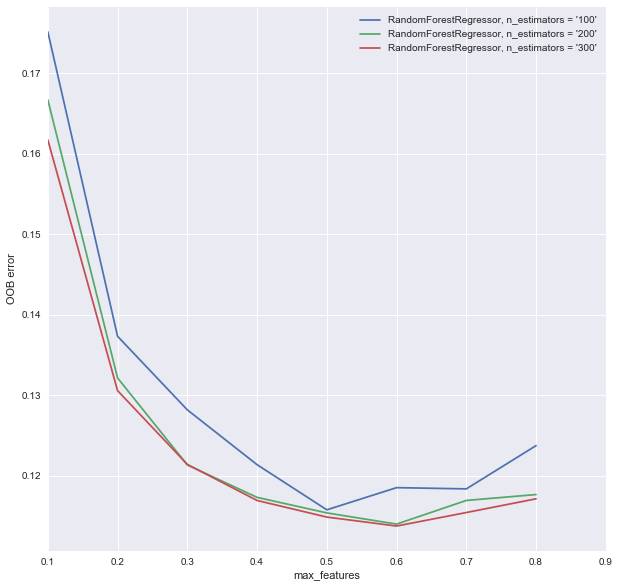

In [696]:
from collections import OrderedDict
# use (1 - OOB_score_) preliminary on the number of trees needed in the forest
# OOB_score_ estimation of error is similar to R^2's way of estimating variations accounted for by the RF model

ensemble_regs = [
    ("RandomForestRegressor, n_estimators = '100'",
        RandomForestRegressor(n_estimators = 100, random_state = 0, bootstrap=True, oob_score = True)),
    ("RandomForestRegressor, n_estimators = '200'",
        RandomForestRegressor(n_estimators = 200, random_state = 0, bootstrap=True, oob_score = True)),
    ("RandomForestRegressor, n_estimators = '300'",
        RandomForestRegressor(n_estimators = 300, random_state = 0, bootstrap=True, oob_score = True))
]

# Map a regressor name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_regs)


min_features = 0.1
max_features = 0.9


for label, reg in ensemble_regs:
    for i in np.arange(min_features, max_features, 0.1):
        reg.set_params(max_features = i)
        reg.fit(x, np.ravel(price))

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - reg.oob_score_
        error_rate[label].append((i, oob_error))

fig = plt.figure(figsize = (10, 10))
        
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, reg_err in error_rate.items():
    xs, ys = zip(*reg_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_features, max_features)
plt.xlabel("max_features")
plt.ylabel("OOB error")
plt.legend(loc="upper right")


plt.show()

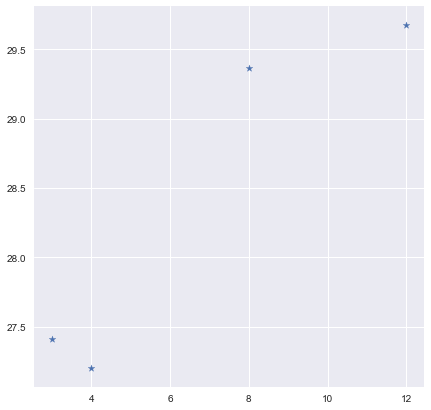

In [675]:
## the following plot is useful when there's only one target parameter to tune

# fig = plt.figure(figsize = (7, 7))

# scores = grid.cv_results_['mean_test_score']
# max_features = [3, 4, 8, 12]
# plt.scatter(max_features, scores, marker = '*')

# plt.show()